In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pwd

'C:\\Users\\A533197\\OneDrive - ATOS\\ATOS (E)\\Learning\\E&ICT IIT Guwahati\\CAPSTONE PROJECT 1\\Telco Customer Churn Prediction'

In [4]:
TCC=pd.read_csv("Telco_Customer_Churn.csv")
TCC

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
TCC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
TCC.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
TCC.duplicated().sum()

0

In [8]:
TCC.rename(columns={"customerID" : "CustomerID","gender" : "Gender", "tenure":"Tenure"},inplace=True)
TCC.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
TCC.describe(include='object').T

,count,unique,top,freq
CustomerID,7043,7043,7590-VHVEG,1
Gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [10]:
#'TotalCharges' columns has value blank that requires treatment
TCC['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [11]:
#Showing data where TotalCharges values are null
TCC[TCC['TotalCharges'].values == ' ']

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
#Replace Blanks with NaN
TCC['TotalCharges'].replace(' ',np.NaN,inplace=True)

In [13]:
TCC[TCC['TotalCharges'].values == ' ']

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [14]:
TCC['TotalCharges'].isnull().sum()

11

In [15]:
#Casting TotalCharges column into float from object
TCC1=TCC.astype({'TotalCharges':'float64'},copy=False)
TCC1.dtypes

CustomerID           object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [16]:
#Columns categorization
num_col = []
cat_col = []
for col in TCC.columns:
    if TCC1[col].dtype != 'object':
        num_col.append(col)
    else:
        cat_col.append(col)
print('Numerical Column: ',num_col)
print('Categorical Column: ',cat_col)

Numerical Column:  ['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Column:  ['CustomerID', 'Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [17]:
TCC1.value_counts('Churn') #Data Imbalance

Churn
No     5174
Yes    1869
dtype: int64

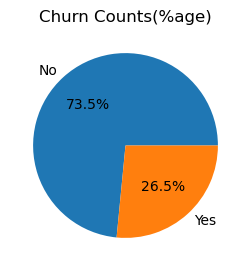

In [18]:
#Class Imbalance
plt.figure(figsize=(3,3))
plt.pie(TCC1.value_counts('Churn'),labels={'Yes','No'},autopct='%1.1f%%')
plt.title('Churn Counts(%age)')
plt.show()

In [19]:
TCC1.drop('CustomerID',axis=1,inplace=True)
TCC1.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
#Label Encoding of Churn variable 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
#Fit Transforming,Renaming,listing
Chrn_df=pd.DataFrame(le.fit_transform(TCC1['Churn']),dtype='int64')
Chrn_df.rename(columns={0:'Churn_le'},inplace=True)
print(Chrn_df,list(le.classes_))

      Churn_le
0            0
1            0
2            1
3            0
4            1
...        ...
7038         0
7039         0
7040         0
7041         1
7042         0

[7043 rows x 1 columns] ['No', 'Yes']


In [22]:
#Merging,Dropping
TCC2=TCC1.join(Chrn_df)

In [23]:
#Dropping
TCC2.drop('Churn',axis=1,inplace=True)
TCC2.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_le
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>],
       [<Axes: title={'center': 'Churn_le'}>, <Axes: >]], dtype=object)

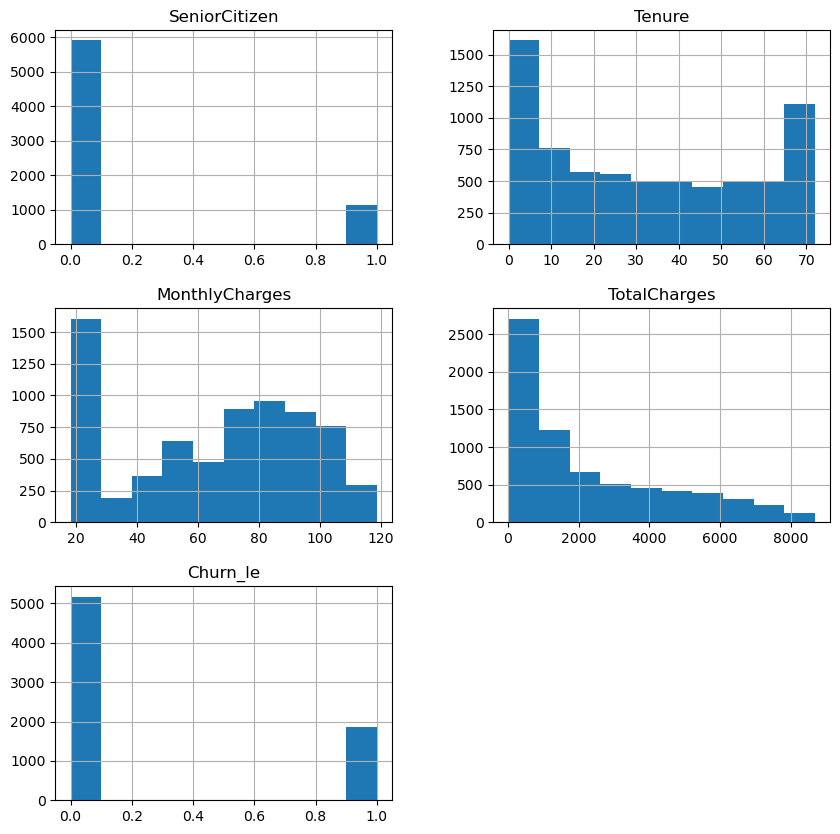

In [24]:
TCC2.hist(figsize=(10,10)) #Numeric Value plot

In [25]:
#Removing 'CustomerID' from list
cat_col.pop(0)
cat_col

['Gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

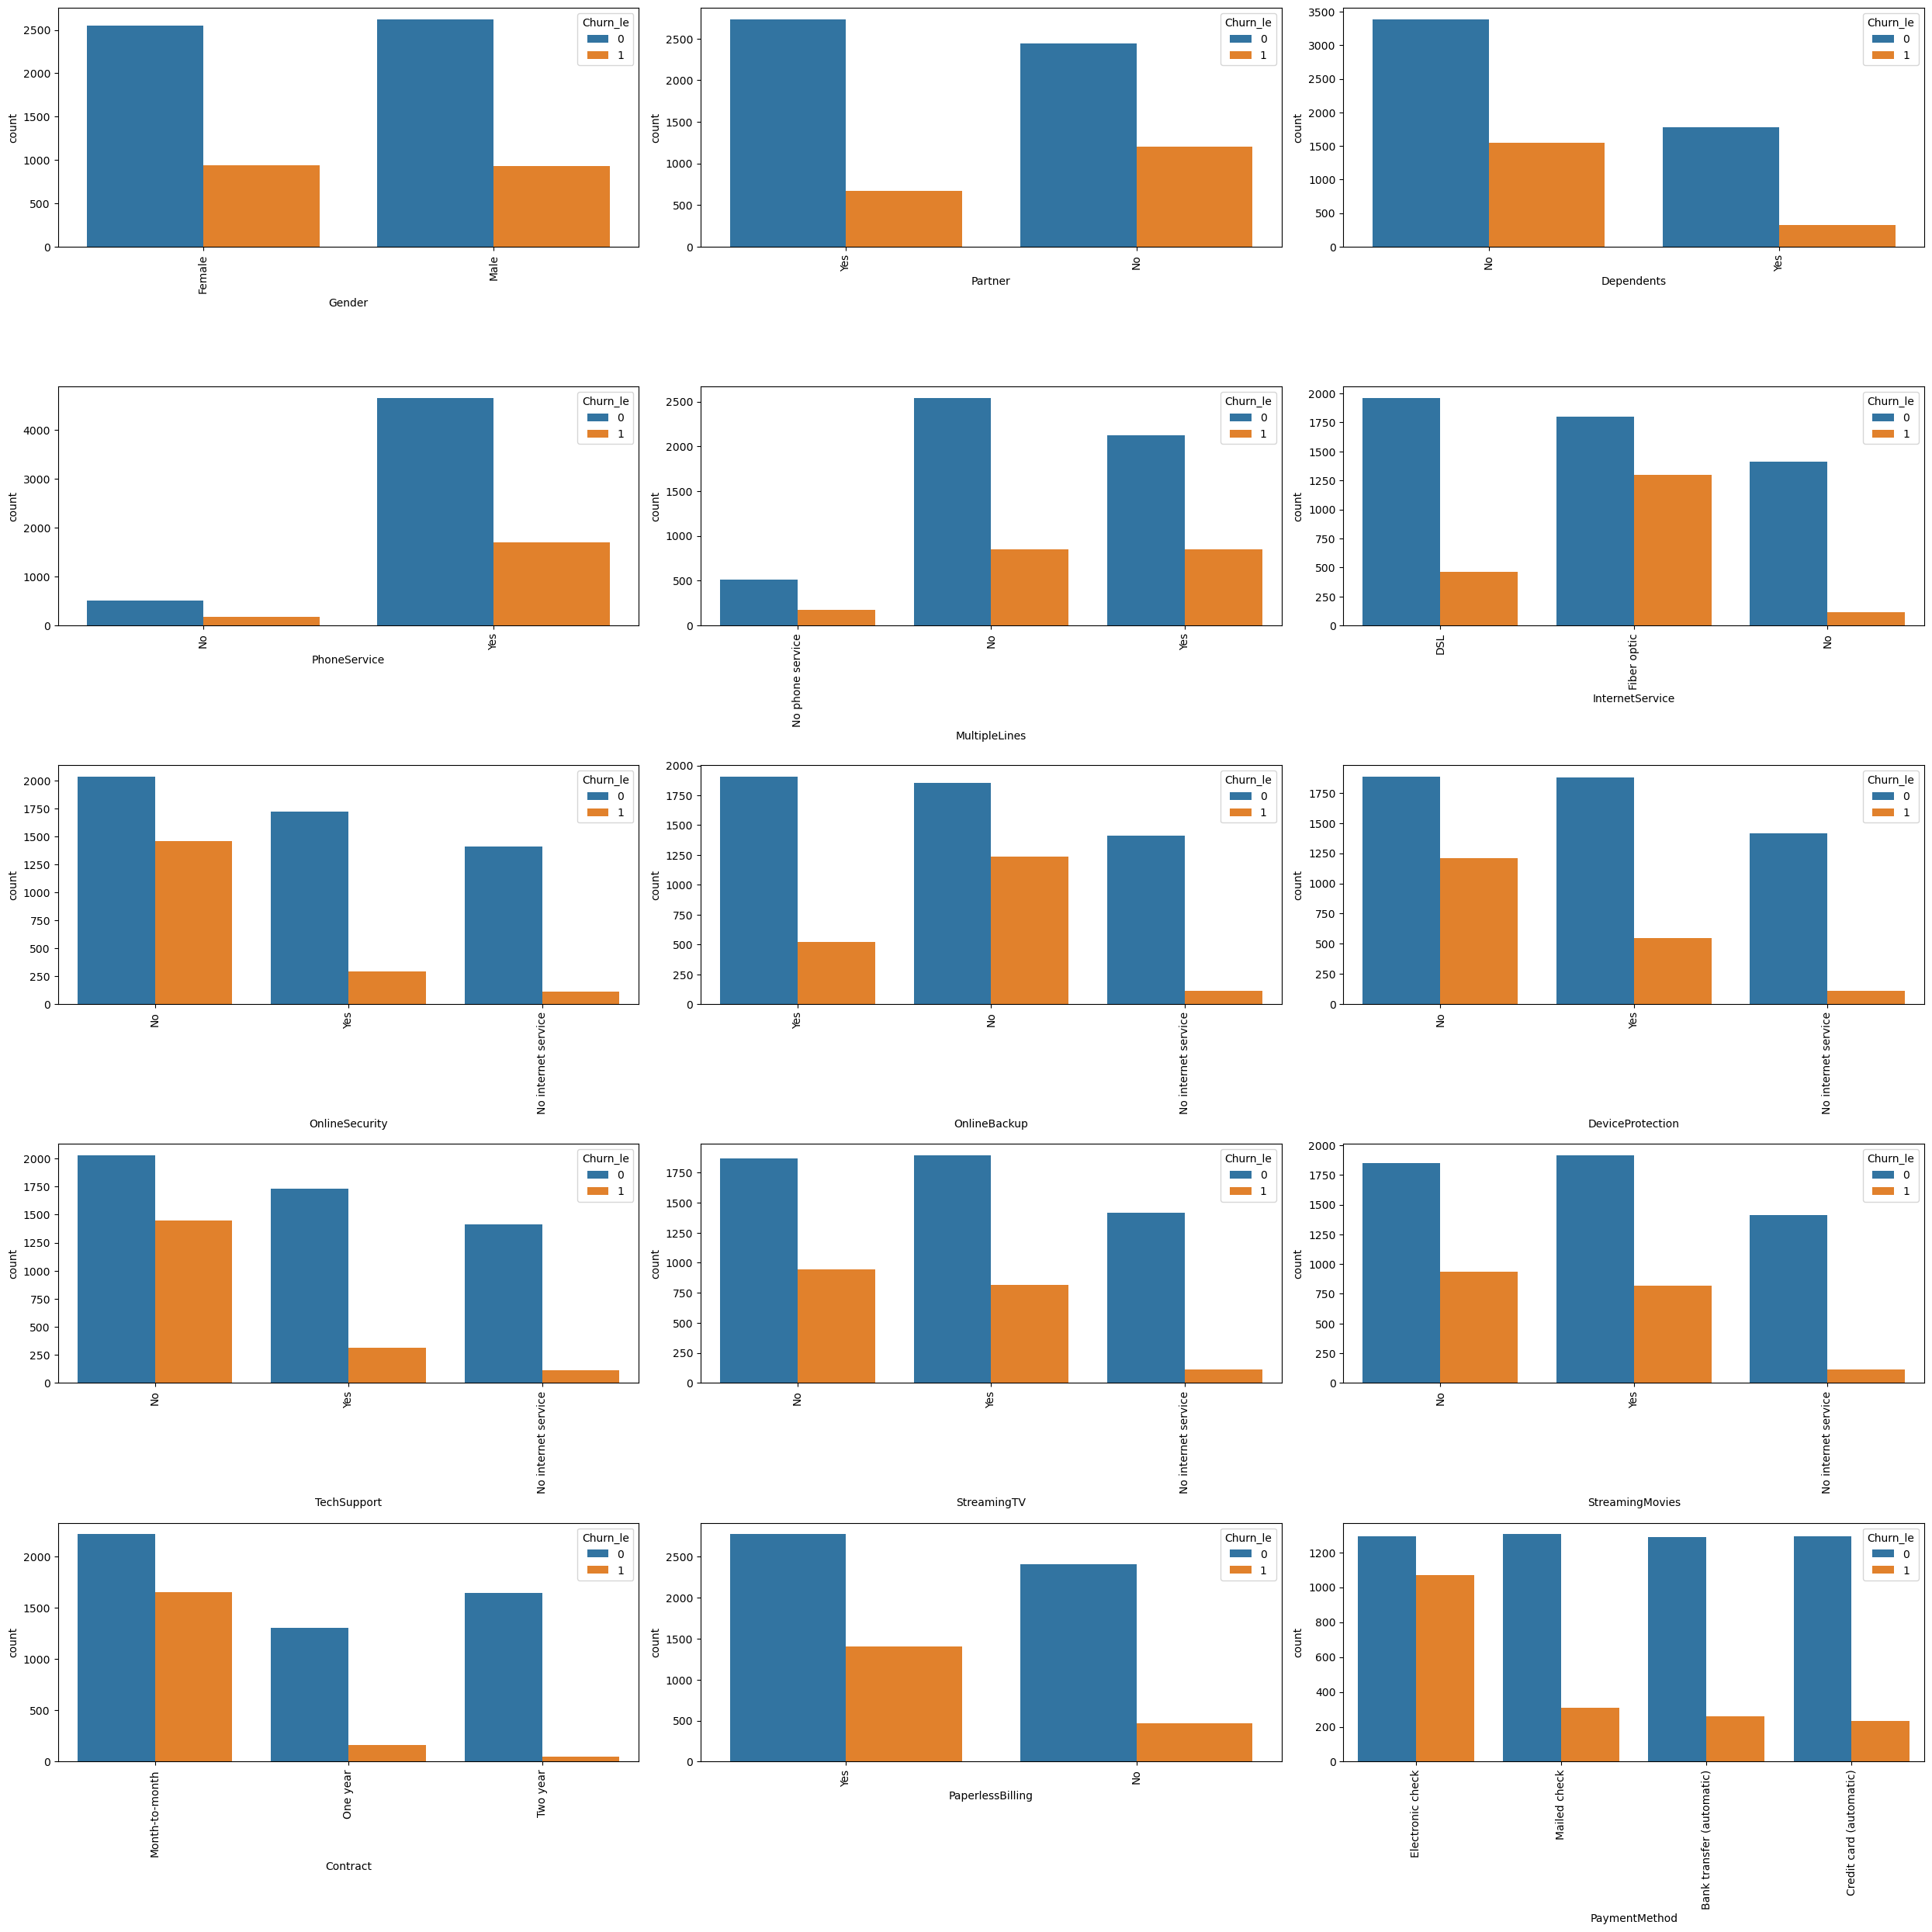

In [26]:
plt.figure(figsize=(25,25))
nc=1
for col in cat_col:
    if nc <=15:
        plt.subplot(5,3,nc)
        sns.countplot(x=col,data=TCC2,hue='Churn_le')
        plt.xticks(rotation = 90)
        #plt.annotate()
    nc=nc+1
plt.tight_layout()
plt.show()

### Churn Analysis Based on Services Opted:
#### Higher Churning for those who are having Services like Internet Service over OpticalFibre.
#### Higher Churning for those who doesn't opted for services like Online security, Online Backup, Device protection.
#### Higher Churning is observed for those where there was no Tech support.
### Churn Analysis Based on mode of Customer Account Operation:
#### Higher Churning rates are for those who are on Monthly Contract.
#### Higher Churning observed who opted for Electronic mode of Payment Method.
### Churn Analysis Based on mode of Demographic info of customers:
#### Higher Churning rates are observed for those who doesn't have Dependent or Partner Connection.

<Axes: >

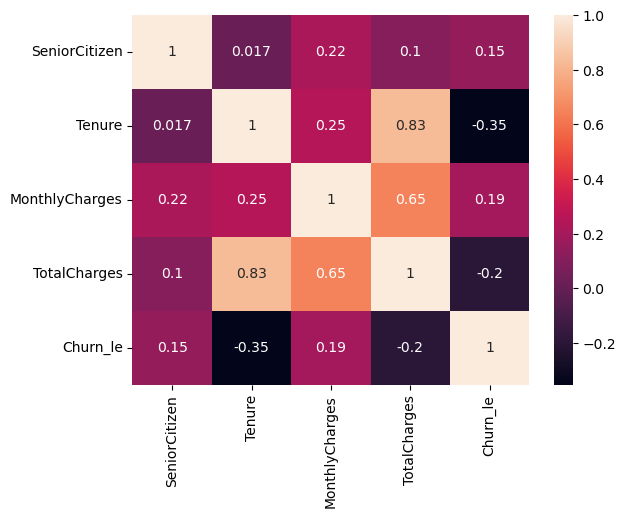

In [27]:
#Tenure & TotalCharges are -vely correlated with churn
sns.heatmap(TCC2.corr(),annot=True)

#### TotalCharges and Tenure are highly Correlated, signifies both variable relation with Churn should be Similar and can be removed if require.

In [28]:
#Analysis to impute TotalCharges where values are null.
TCC2['TotalCharges'].isnull().sum()

11

In [29]:
TCC2[TCC2['TotalCharges'].isnull()]

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_le
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


In [30]:
#Imputing Null values with 0 as Tenure is also 0.
TCC2['TotalCharges'].replace(np.NaN,0,inplace=True)

In [31]:
TCC2['TotalCharges'].isnull().sum()

0

In [32]:
TCC2[TCC2['TotalCharges'].values == 0]

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_le
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,0
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,0
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,0
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,0
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,0


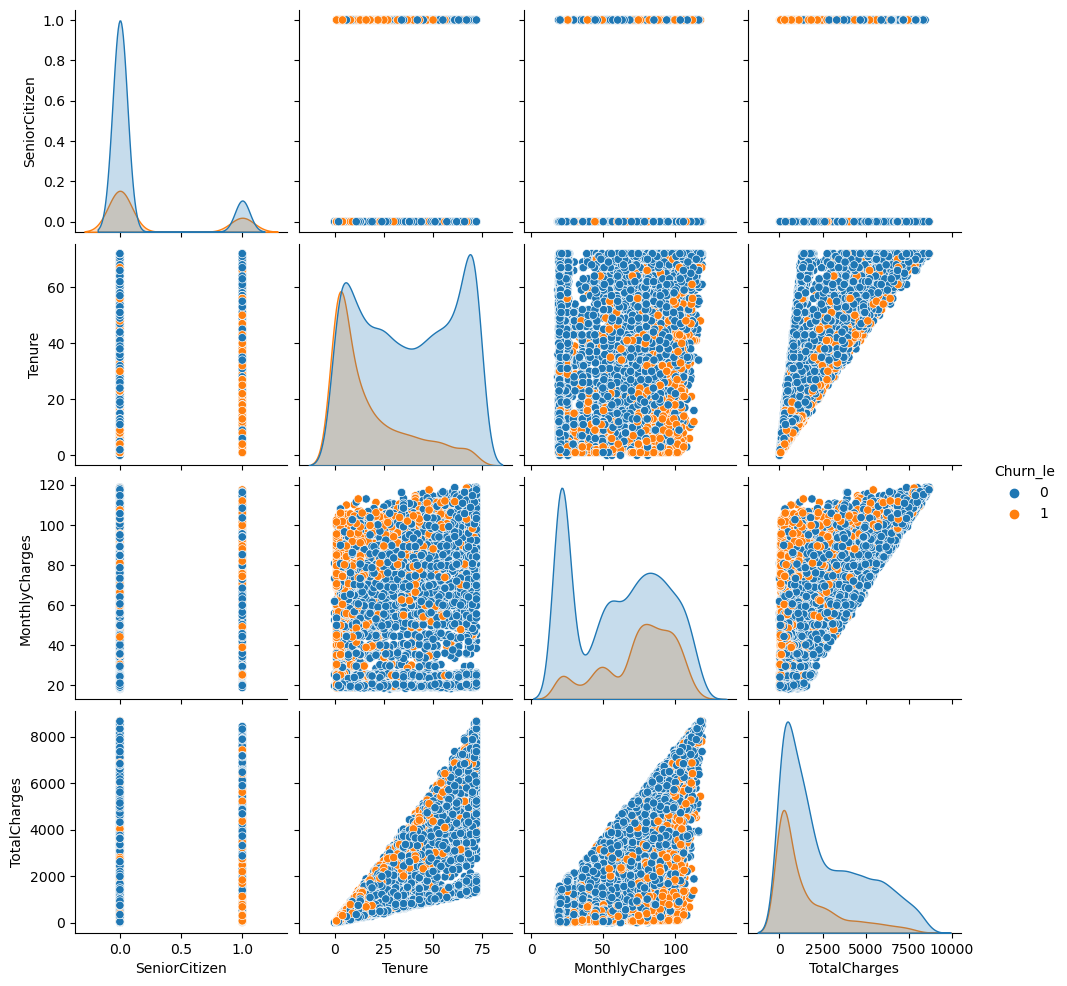

In [33]:
#Numeric_Variable Analysis
sns.pairplot(data=TCC2,hue='Churn_le')

##### Higher Churn rate when Monthly Charges are high
#### Senior Citizen Churn rates higher than Lower Age Population
#### Higher the Tenure of stay, Lower the Churn Rate

In [34]:
#popping last element from cat-col
cat_col.pop()
cat_col

['Gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [35]:
TCC2[cat_col]

,Gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [36]:
for col in cat_col:
    x=TCC2[col].unique()
    print(col,' : ',x)

Gender  :  ['Female' 'Male']
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No phone service' 'No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
OnlineBackup  :  ['Yes' 'No' 'No internet service']
DeviceProtection  :  ['No' 'Yes' 'No internet service']
TechSupport  :  ['No' 'Yes' 'No internet service']
StreamingTV  :  ['No' 'Yes' 'No internet service']
StreamingMovies  :  ['No' 'Yes' 'No internet service']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [37]:
#Label Encoding of all other categorical variable
#Fit Transforming,Renaming,listing
TCC3=TCC2
for col in cat_col:
    TCC_cat_le=pd.DataFrame(le.fit_transform(TCC1[col]),dtype='int64')
    TCC_cat_le.rename(columns={0:col+'_le'},inplace=True)
    TCC3=TCC3.join(TCC_cat_le)
    print(TCC_cat_le,list(le.classes_))

      Gender_le
0             0
1             1
2             1
3             1
4             0
...         ...
7038          1
7039          0
7040          0
7041          1
7042          1

[7043 rows x 1 columns] ['Female', 'Male']
      Partner_le
0              1
1              0
2              0
3              0
4              0
...          ...
7038           1
7039           1
7040           1
7041           1
7042           0

[7043 rows x 1 columns] ['No', 'Yes']
      Dependents_le
0                 0
1                 0
2                 0
3                 0
4                 0
...             ...
7038              1
7039              1
7040              1
7041              0
7042              0

[7043 rows x 1 columns] ['No', 'Yes']
      PhoneService_le
0                   0
1                   1
2                   1
3                   0
4                   1
...               ...
7038                1
7039                1
7040                0
7041                1


In [38]:
#Dropping
TCC3.drop(cat_col,axis=1,inplace=True)
TCC3.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Churn_le,Gender_le,Partner_le,Dependents_le,PhoneService_le,MultipleLines_le,InternetService_le,OnlineSecurity_le,OnlineBackup_le,DeviceProtection_le,TechSupport_le,StreamingTV_le,StreamingMovies_le,Contract_le,PaperlessBilling_le,PaymentMethod_le
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,0,2,53.85,108.15,1,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2


In [39]:
TCC3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SeniorCitizen        7043 non-null   int64  
 1   Tenure               7043 non-null   int64  
 2   MonthlyCharges       7043 non-null   float64
 3   TotalCharges         7043 non-null   float64
 4   Churn_le             7043 non-null   int64  
 5   Gender_le            7043 non-null   int64  
 6   Partner_le           7043 non-null   int64  
 7   Dependents_le        7043 non-null   int64  
 8   PhoneService_le      7043 non-null   int64  
 9   MultipleLines_le     7043 non-null   int64  
 10  InternetService_le   7043 non-null   int64  
 11  OnlineSecurity_le    7043 non-null   int64  
 12  OnlineBackup_le      7043 non-null   int64  
 13  DeviceProtection_le  7043 non-null   int64  
 14  TechSupport_le       7043 non-null   int64  
 15  StreamingTV_le       7043 non-null   i

### Scaling For Variables Tenure,MonthlyCharges,TotalCharges-- Feature Engineering

In [40]:
#MinMax Scaler (range 0 to 1)
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [41]:
TCC3['Tenure']=sc.fit_transform(TCC3[['Tenure']])
TCC3['MonthlyCharges']=sc.fit_transform(TCC3[['MonthlyCharges']])
TCC3['TotalCharges']=sc.fit_transform(TCC3[['TotalCharges']])
TCC3

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Churn_le,Gender_le,Partner_le,Dependents_le,PhoneService_le,MultipleLines_le,InternetService_le,OnlineSecurity_le,OnlineBackup_le,DeviceProtection_le,TechSupport_le,StreamingTV_le,StreamingMovies_le,Contract_le,PaperlessBilling_le,PaymentMethod_le
0,0,0.013889,0.115423,0.003437,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,0,0.472222,0.385075,0.217564,0,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,0,0.027778,0.354229,0.012453,1,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,0,0.625000,0.239303,0.211951,0,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0.027778,0.521891,0.017462,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.333333,0.662189,0.229194,0,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,0,1.000000,0.845274,0.847792,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,0,0.152778,0.112935,0.039892,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2
7041,1,0.055556,0.558706,0.035303,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3


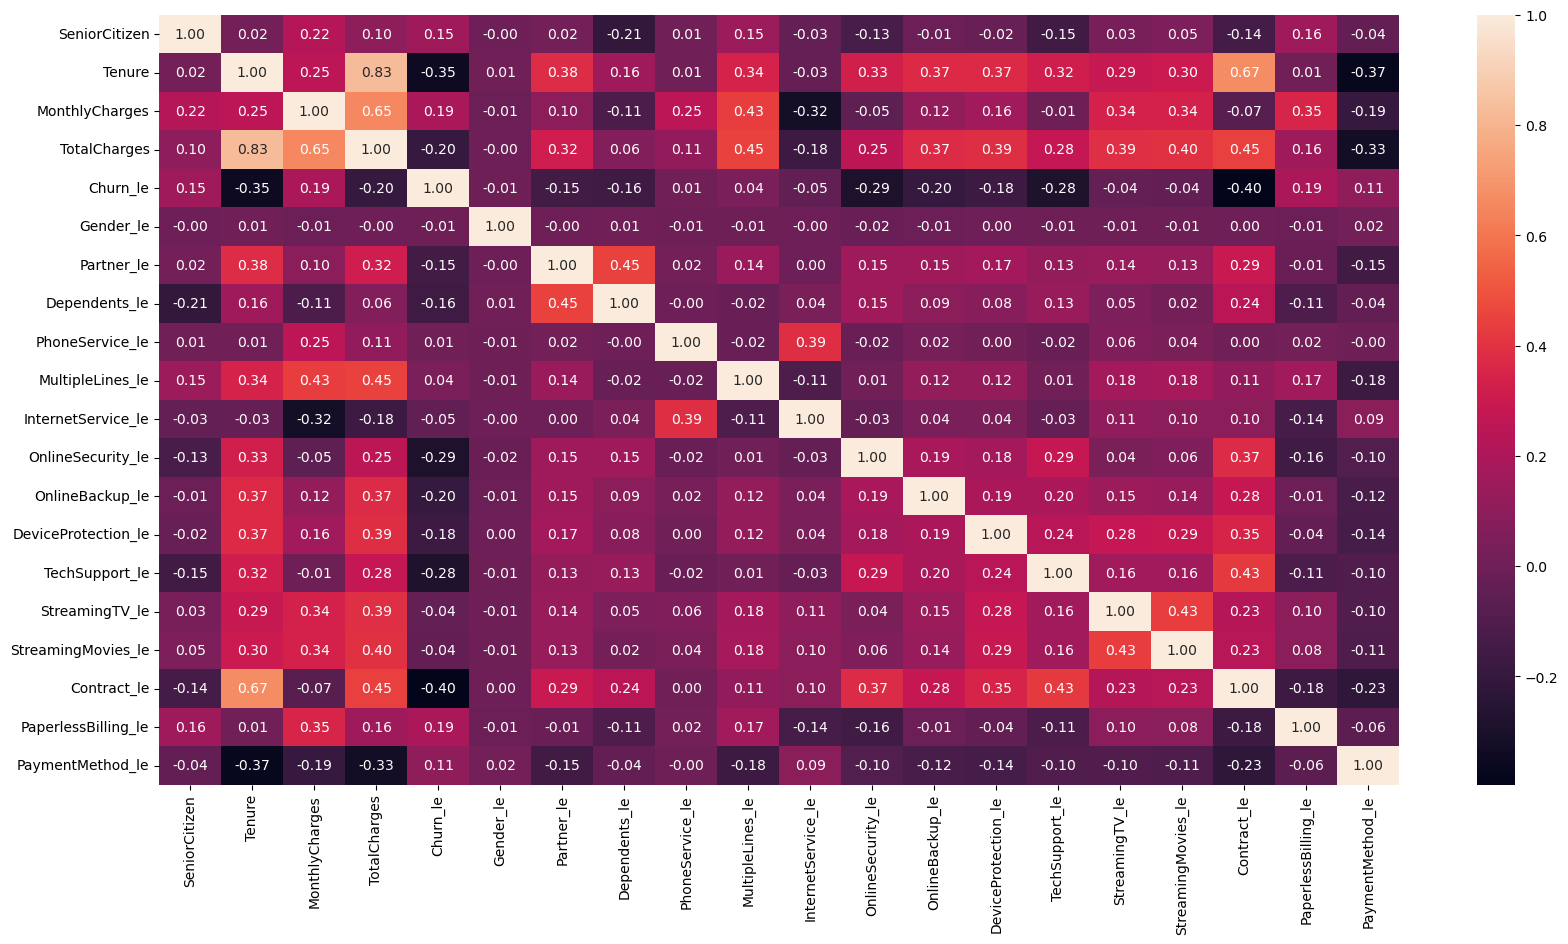

In [42]:
#Correlation among different variables.
plt.figure(figsize=(20,10))
sns.heatmap(TCC3.corr(),annot=True,fmt='.2f')
plt.show()

#### As deduced earlier which is evident here as well:
1. TotalCharges and Tenure are highly coorelated variables.
2. TotalCharges and MonthlyCharges are positively coorelated.
3. Tenure and Contract term are positively coorelated.
4. Churn rate is negatively correlated with different services opted (e.g: OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract Term).
5. Churn rate is also negatively coorelated with Tenure and TotalCharges as an obvious and expected.

In [43]:
#Feature Seletion to Choose important varaiables

#### Splitting Dependent and Independent Variables into x,y datafarames

In [44]:
x= TCC3.drop('Churn_le',axis=1)
x

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender_le,Partner_le,Dependents_le,PhoneService_le,MultipleLines_le,InternetService_le,OnlineSecurity_le,OnlineBackup_le,DeviceProtection_le,TechSupport_le,StreamingTV_le,StreamingMovies_le,Contract_le,PaperlessBilling_le,PaymentMethod_le
0,0,0.013889,0.115423,0.003437,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,0,0.472222,0.385075,0.217564,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,0,0.027778,0.354229,0.012453,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,0,0.625000,0.239303,0.211951,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0.027778,0.521891,0.017462,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.333333,0.662189,0.229194,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,0,1.000000,0.845274,0.847792,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,0,0.152778,0.112935,0.039892,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2
7041,1,0.055556,0.558706,0.035303,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3


In [45]:
y=pd.DataFrame(TCC3['Churn_le'])
y

,Churn_le
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [46]:
#Splitting into train-test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=20)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4930, 19), (2113, 19), (4930, 1), (2113, 1))

#### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
log_mod=LogisticRegression()
log_mod.fit(x_train,y_train)

LogisticRegression()

In [48]:
y_predict_lr=log_mod.predict(x_test)
accuracy_lr=accuracy_score(y_test,y_predict_lr)
print("LR Training Accuracy: {:.3f}".format(log_mod.score(x_train, y_train)))
print("LR Testing Accuracy: {:.3f}".format(log_mod.score(x_test, y_test)))
print("LR Overall Accouracy: {:.3f}".format(accuracy_lr))

LR Training Accuracy: 0.798
LR Testing Accuracy: 0.812
LR Overall Accouracy: 0.812


In [49]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics

Text(0.5, 1.0, 'Logistic Reression')

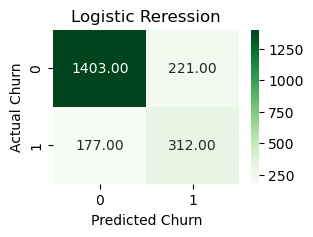

In [50]:
lr_cm = metrics.confusion_matrix(y_predict_lr, y_test)
plt.figure(figsize=(3,2))
sns.heatmap(lr_cm, annot=True, fmt='.2f',xticklabels = ["0", "1"] , yticklabels = ["0", "1"],cmap='Greens')
plt.ylabel('Actual Churn')
plt.xlabel('Predicted Churn')
plt.title('Logistic Reression')

###### Here Count 221 (i.e. False Positive) is to be more emphasized and such model to be preferred wherein this value is less i.e. Where Prediction is not churned but actually it is Churned.
###### But also we cannot ignore the value 177 (i.e.False Negative) where model is predicting wrong churn wherein Marketing may keep in promoting to wrong customers who will not be churned thus leadning to wrong market target. 

#### RandomForest Regresion

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_mod = RandomForestClassifier()
rf_mod.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
y_predict_rf=rf_mod.predict(x_test)
accuracy_rf=accuracy_score(y_test,y_predict_rf)
print("RF Training Accuracy: {:.3f}".format(rf_mod.score(x_train, y_train)))
print("RF Testing Accuracy: {:.3f}".format(rf_mod.score(x_test, y_test)))
print("RF Overall Accouracy: {:.3f}".format(accuracy_rf))

RF Training Accuracy: 0.998
RF Testing Accuracy: 0.795
RF Overall Accouracy: 0.795


##### No Improvement in accuracy from LR to RF, rather model is overfitted wherin Training Accuracy is higher than Testing Accuracy

Text(0.5, 1.0, 'Random Forest')

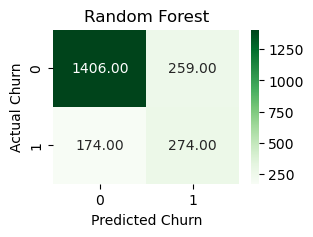

In [53]:
rf_cm = metrics.confusion_matrix(y_predict_rf, y_test)
plt.figure(figsize=(3,2))
sns.heatmap(rf_cm, annot=True, fmt='.2f',xticklabels = ["0", "1"] , yticklabels = ["0", "1"],cmap='Greens')
plt.ylabel('Actual Churn')
plt.xlabel('Predicted Churn')
plt.title('Random Forest')

#### AdaBooster

In [54]:
#Boosting
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
#from xgboost import XGBClassifier

In [55]:
Dtree = DecisionTreeClassifier(max_depth=2, random_state=23)
adaboost = AdaBoostClassifier(base_estimator=Dtree, n_estimators=5, learning_rate=0.1, random_state=23)
adaboost.fit(x_train, y_train)
y_predict_ab=adaboost.predict(x_test)
accuracy_ab=accuracy_score(y_test,y_predict_ab)
print("Adaboost Training Accuracy: {:.3f}".format(adaboost.score(x_train, y_train)))
print("Adaboost Testing Accuracy: {:.3f}".format(adaboost.score(x_test, y_test)))
print("Adaboost Overall Accouracy: {:.3f}".format(accuracy_ab))

Adaboost Training Accuracy: 0.775
Adaboost Testing Accuracy: 0.789
Adaboost Overall Accouracy: 0.789


Text(0.5, 1.0, 'AdaBoost')

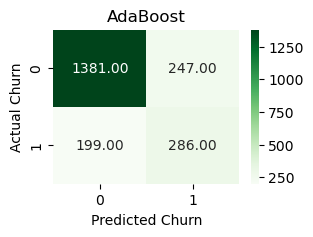

In [56]:
ab_cm = metrics.confusion_matrix(y_predict_ab, y_test)
plt.figure(figsize=(3,2))
sns.heatmap(ab_cm, annot=True, fmt='.2f',xticklabels = ["0", "1"] , yticklabels = ["0", "1"],cmap='Greens')
plt.ylabel('Actual Churn')
plt.xlabel('Predicted Churn')
plt.title('AdaBoost')

In [72]:
#As seen boosting technique is not improving the accuracy,will try with Cross Validation Technique.
#Stratified K-fold CVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [73]:
skfold=StratifiedKFold(n_splits=5)
model=DecisionTreeClassifier()
scores=cross_val_score(model,x_train, y_train,cv=skfold)
print(np.mean(scores))

0.7188640973630831


In [74]:
scores

array([0.72515213, 0.71501014, 0.70993915, 0.72920892, 0.71501014])

In [75]:
#Stratified K-fold CVC with Logistic Regression
model=LogisticRegression()
scores=cross_val_score(model,x_train, y_train,cv=skfold)
print(np.mean(scores))

0.7941176470588235


In [57]:
#ROC_AUC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

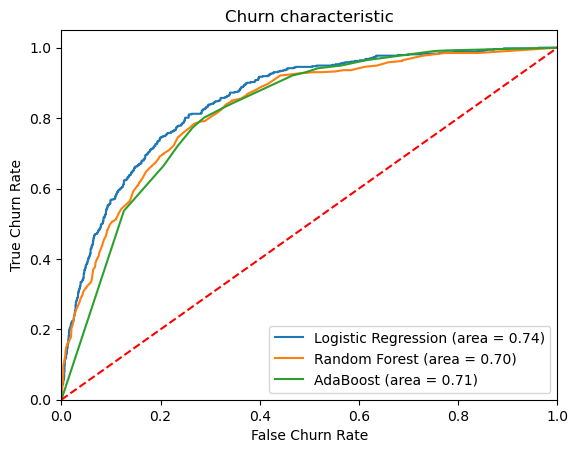

In [58]:
log_roc_auc = roc_auc_score(y_test,y_predict_lr)
fpr, tpr, thresholds = roc_curve(y_test, log_mod.predict_proba(x_test)[:,1])
rf_roc_auc = roc_auc_score(y_test,y_predict_rf)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_mod.predict_proba(x_test)[:,1])
ab_roc_auc = roc_auc_score(y_test,y_predict_ab)
ab_fpr, ab_tpr, ab_thresholds = roc_curve(y_test, adaboost.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(ab_fpr, ab_tpr, label='AdaBoost (area = %0.2f)' % ab_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Churn Rate')
plt.ylabel('True Churn Rate')
plt.title('Churn characteristic')
plt.legend(loc="lower right")
plt.show()

In [59]:
#Try After Handing Class Imbalance in the 

In [60]:
TCC3['Churn_le'].value_counts()

0    5174
1    1869
Name: Churn_le, dtype: int64

In [61]:
#OverSampling Using SMOTE
from imblearn.over_sampling import SMOTE

In [62]:
sm=SMOTE()
x_bal,y_bal = sm.fit_resample(x,y)

In [63]:
#Count after SMOTE 
y_bal.value_counts()

Churn_le
0           5174
1           5174
dtype: int64

In [64]:
#Modelling after Class balance fit

In [65]:
#Splitting into train-test data after fixing class imbalance.
x_bal_train,x_bal_test,y_bal_train,y_bal_test = train_test_split(x_bal,y_bal,train_size=0.7,random_state=30)
x_bal_train.shape,x_bal_test.shape,y_bal_train.shape,y_bal_test.shape

((7243, 19), (3105, 19), (7243, 1), (3105, 1))

In [66]:
log_mod_bal=LogisticRegression()
log_mod_bal.fit(x_bal_train,y_bal_train)

LogisticRegression()

In [67]:
y_bal_predict_lr=log_mod_bal.predict(x_bal_test)
accuracy_bal_lr=accuracy_score(y_bal_test,y_bal_predict_lr)
print("LR Training Accuracy: {:.3f}".format(log_mod_bal.score(x_bal_train, y_bal_train)))
print("LR Testing Accuracy: {:.3f}".format(log_mod_bal.score(x_bal_test, y_bal_test)))
print("LR Overall Accouracy: {:.3f}".format(accuracy_bal_lr))

LR Training Accuracy: 0.782
LR Testing Accuracy: 0.774
LR Overall Accouracy: 0.774


In [68]:
#Boosting
Dtree = DecisionTreeClassifier(max_depth=2, random_state=30)
adaboost = AdaBoostClassifier(base_estimator=Dtree, n_estimators=5, learning_rate=0.1, random_state=30)
adaboost.fit(x_bal_train, y_bal_train)
print(f"Train score: {adaboost.score(x_bal_train, y_bal_train)}")
print(f"Test score: {adaboost.score(x_bal_test, y_bal_test)}")

Train score: 0.7563164434626536
Test score: 0.7555555555555555


### Summary:
##### After Trying with multiple modelling, it is observed that Logisting Regression is giving good accuracy of around 82% and we will select this model for the project.